In [99]:
! pip install yfinance
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com


34.73.117.189


In [39]:
import yfinance as yf

In [40]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [41]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [42]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-02-14,4.789524,4.791758,4.491963,4.537875,1548269624
2005-02-15,4.845115,4.959524,4.791758,4.804662,1035177611
2005-02-16,4.924035,4.946867,4.822036,4.831963,663770685
2005-02-17,4.911378,4.957290,4.884327,4.909640,418137429
2005-02-18,4.912619,4.934706,4.880604,4.926517,340708289


In [43]:
google_data.shape

(5033, 5)

In [44]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,49.655671,50.157745,49.138066,49.632481,1.062883e+08
std,47.651134,48.147842,47.149620,47.615644,1.384643e+08
min,4.342810,4.427436,4.282751,4.350503,1.584340e+05
25%,13.418807,13.543640,13.281816,13.420048,2.632390e+07
50%,28.374863,28.654091,28.125391,28.412126,4.950486e+07
75%,66.829376,67.398830,66.103238,66.662480,1.296481e+08
max,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [45]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-02-14 to 2025-02-13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [46]:
google_data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

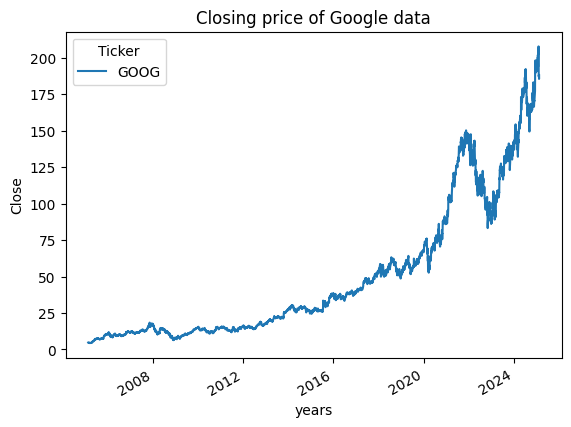

In [48]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [49]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [50]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

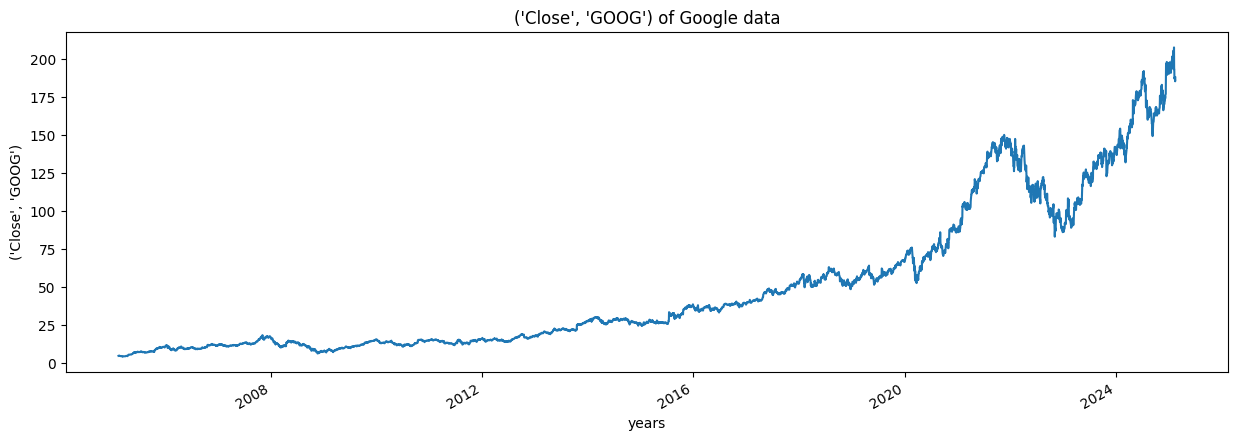

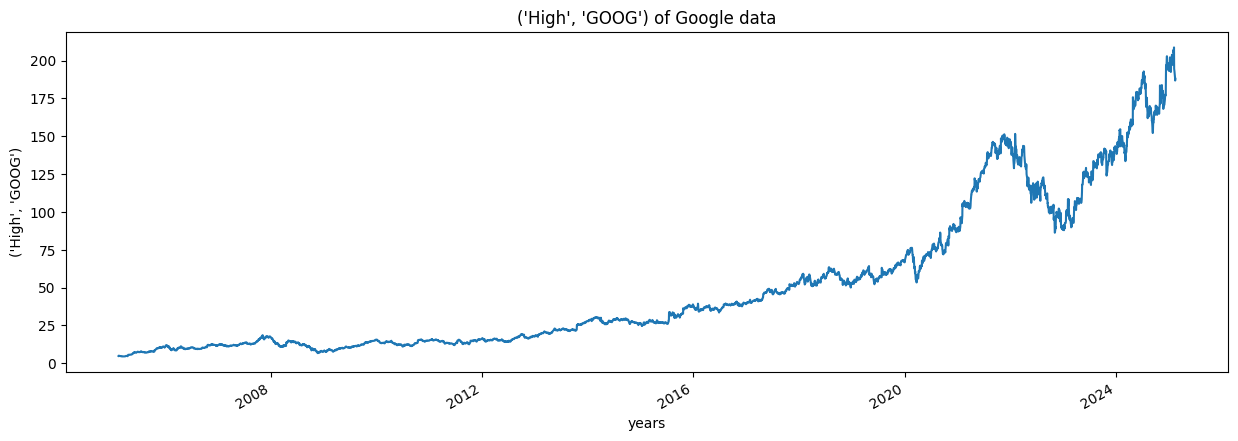

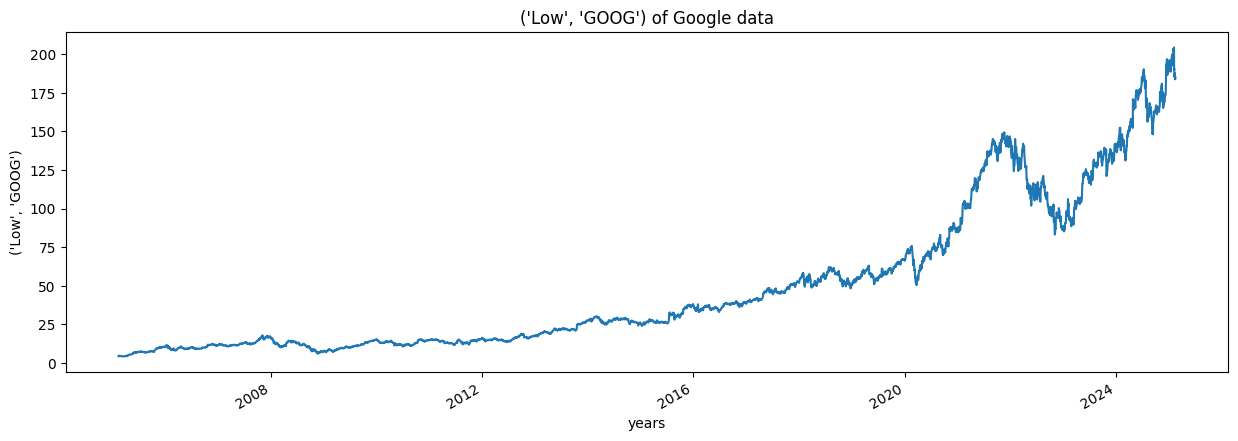

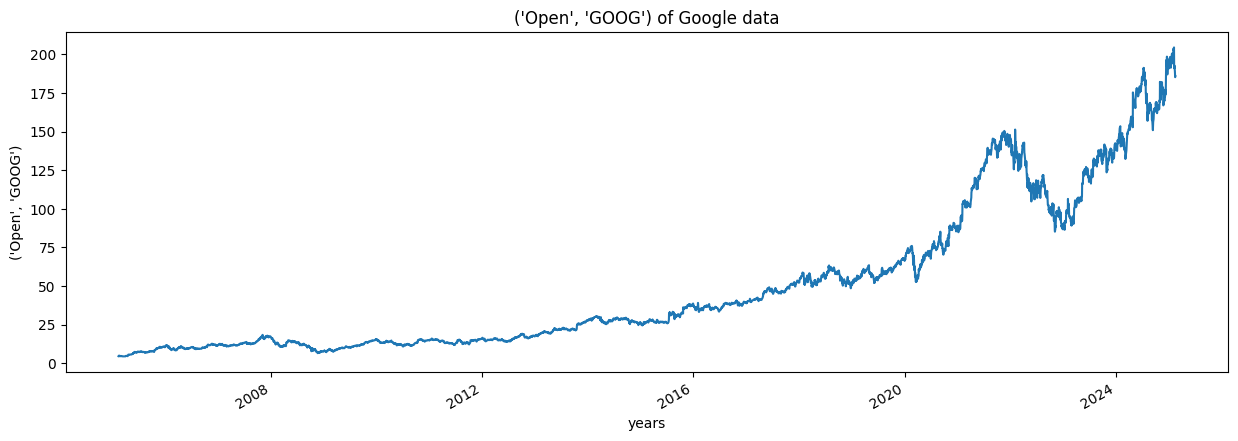

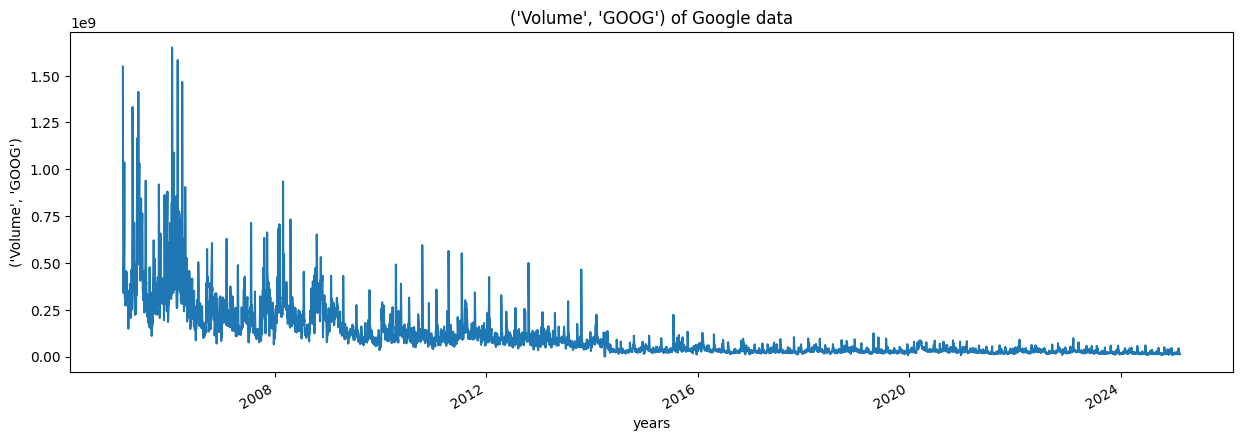

In [51]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [52]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [53]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [54]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [55]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [56]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 223
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [58]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [59]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-02-03,NaN
2006-02-06,NaN
2006-02-07,NaN
2006-02-08,NaN
2006-02-09,7.538371


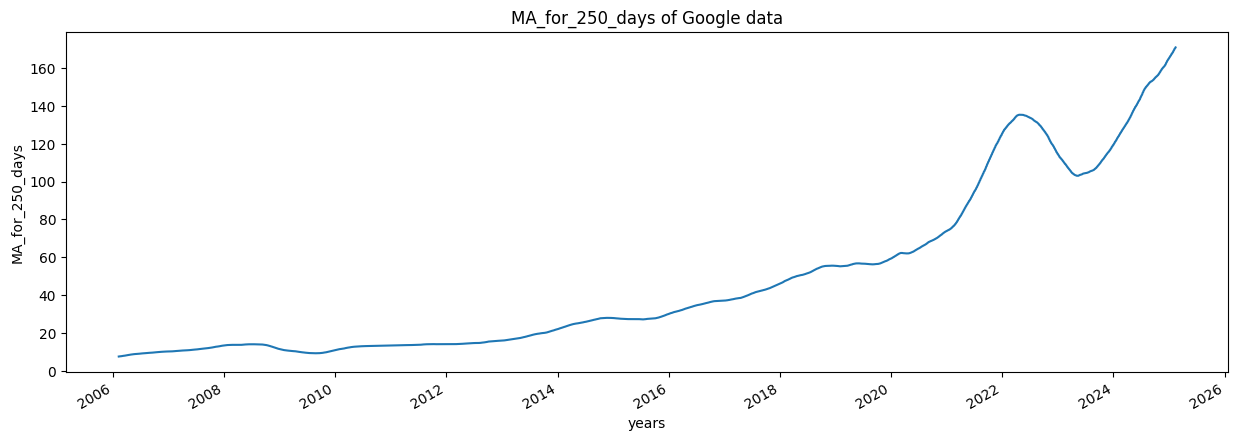

In [60]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

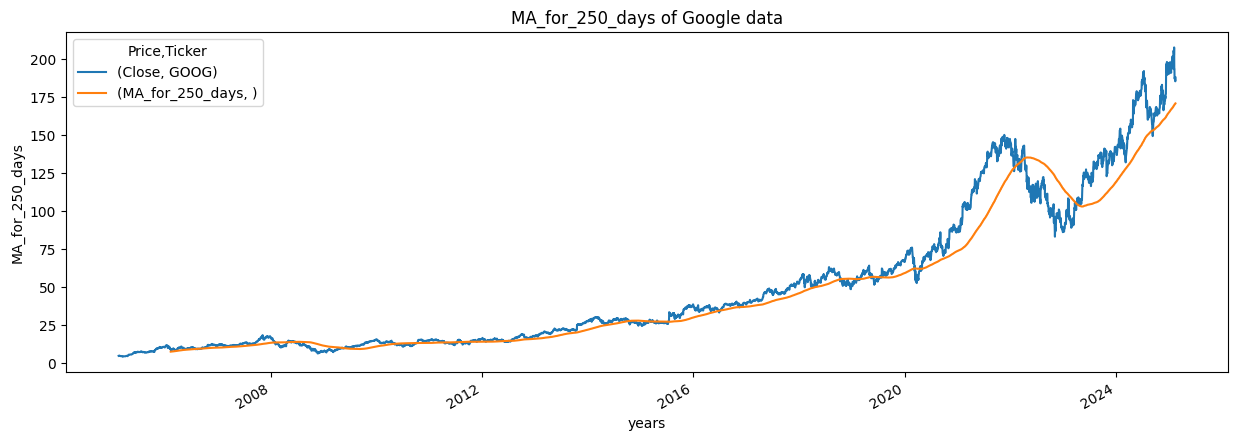

In [62]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

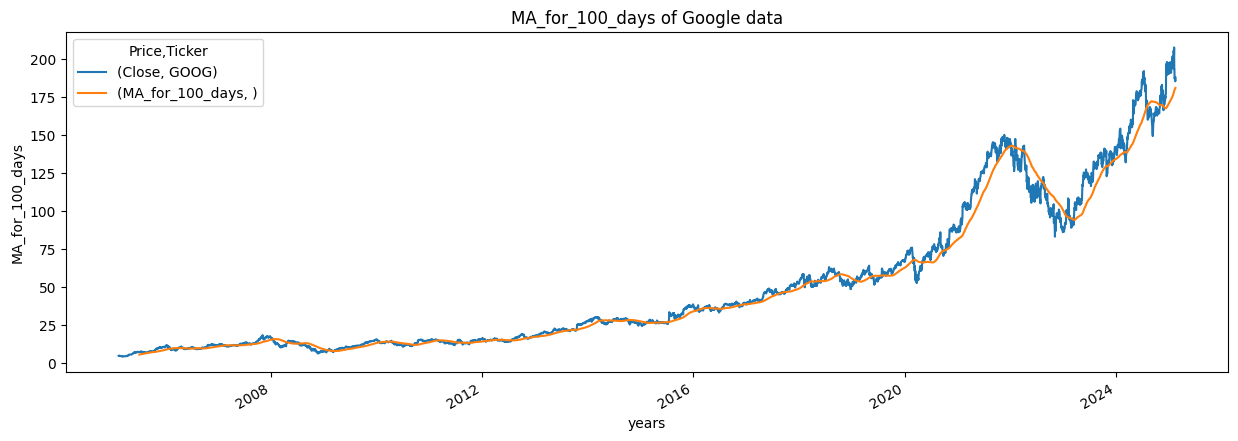

In [67]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

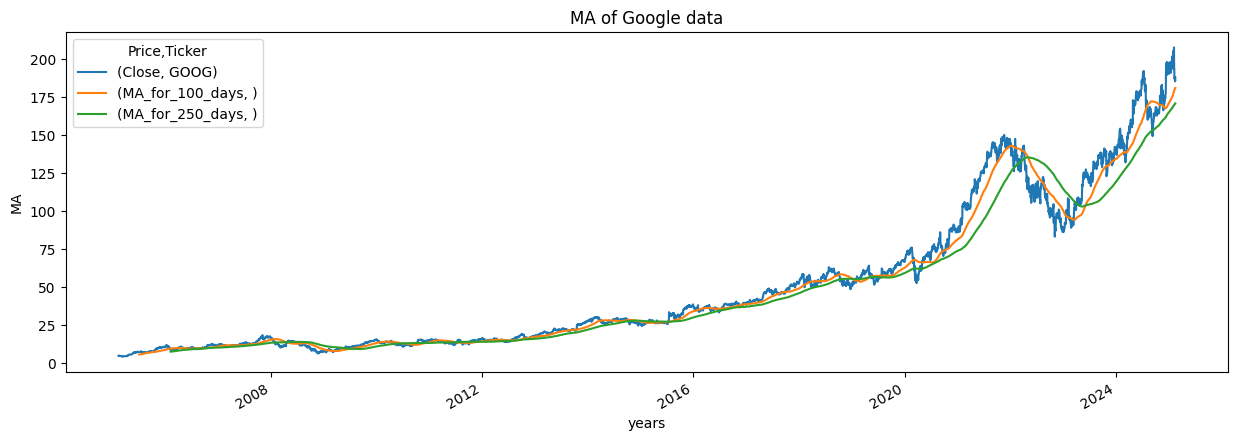

In [68]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [70]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-02-14,4.789524,NaN
2005-02-15,4.845115,0.011607
2005-02-16,4.924035,0.016289
2005-02-17,4.911378,-0.002570
2005-02-18,4.912619,0.000253


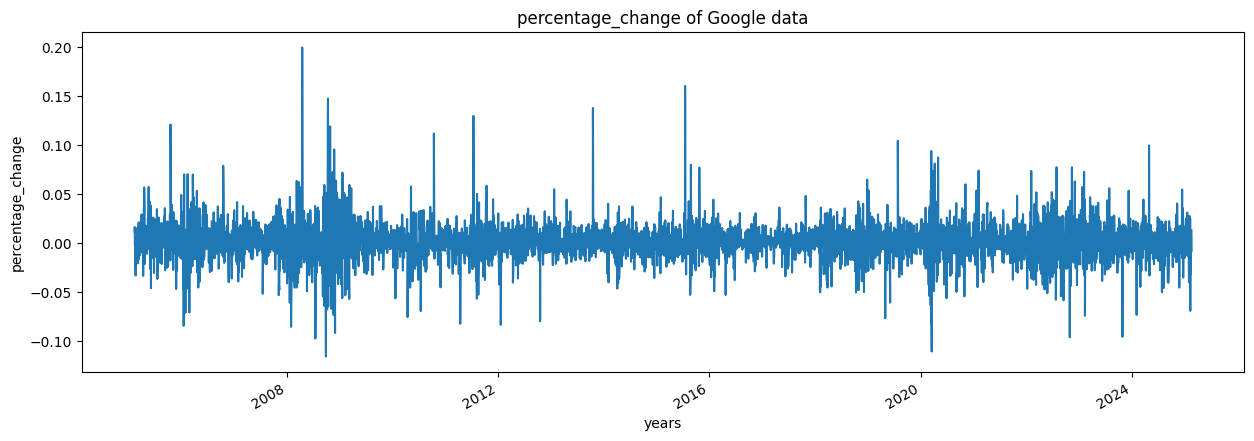

In [71]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [72]:
Adj_close_price = google_data[['Close']]

In [73]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([207.71000671]), array([4.34280968]))

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00219659],
       [0.00246994],
       [0.00285801],
       ...,
       [0.89850871],
       [0.89044441],
       [0.90249164]])

In [75]:
len(scaled_data)

5033

In [76]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [77]:
x_data[0],y_data[0]

(array([[2.19659025e-03],
        [2.46994126e-03],
        [2.85800957e-03],
        [2.79577392e-03],
        [2.80187252e-03],
        [1.99889600e-03],
        [2.31374369e-03],
        [1.69625486e-03],
        [1.32771565e-03],
        [1.58642394e-03],
        [1.35090249e-03],
        [1.24351241e-03],
        [1.46683434e-03],
        [1.33137574e-03],
        [1.68648914e-03],
        [1.24595325e-03],
        [7.76127240e-04],
        [6.08942363e-04],
        [3.42911534e-04],
        [0.00000000e+00],
        [4.41759830e-04],
        [7.44398621e-05],
        [5.24739127e-04],
        [6.16262549e-04],
        [7.18775627e-04],
        [4.40540581e-04],
        [4.86909572e-04],
        [5.19859785e-04],
        [7.84669020e-04],
        [5.58908590e-04],
        [6.66298666e-04],
        [6.73616507e-04],
        [6.16262549e-04],
        [1.25693822e-03],
        [1.65720606e-03],
        [1.73652526e-03],
        [2.29055217e-03],
        [2.08187764e-03],
        [2.2

In [78]:

int(len(x_data)*0.7)

3453

In [79]:
4908-100-int(len(x_data)*0.7)

1355

In [80]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [81]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [82]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [83]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [85]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 317s 91ms/step - loss: 1.7147e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 311s 90ms/step - loss: 5.5965e-05


In [86]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [87]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


In [88]:
predictions

array([[0.2629608 ],
       [0.26189095],
       [0.26274323],
       ...,
       [0.8425259 ],
       [0.8443981 ],
       [0.843033  ]], dtype=float32)

In [89]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.820408],
       [ 57.602837],
       [ 57.776165],
       ...,
       [175.68494 ],
       [176.06567 ],
       [175.78807 ]], dtype=float32)

In [90]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.2153244 ],
       [ 58.45546341],
       [ 59.5076828 ],
       ...,
       [187.07000732],
       [185.42999268],
       [187.88000488]])

In [91]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [92]:
rmse

5.838950001145459

In [93]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-03-28,58.215324,57.820408
2019-03-29,58.455463,57.602837
2019-04-01,59.507683,57.776165
2019-04-02,59.809601,58.561768
2019-04-03,60.080128,59.172298


<Figure size 640x480 with 0 Axes>

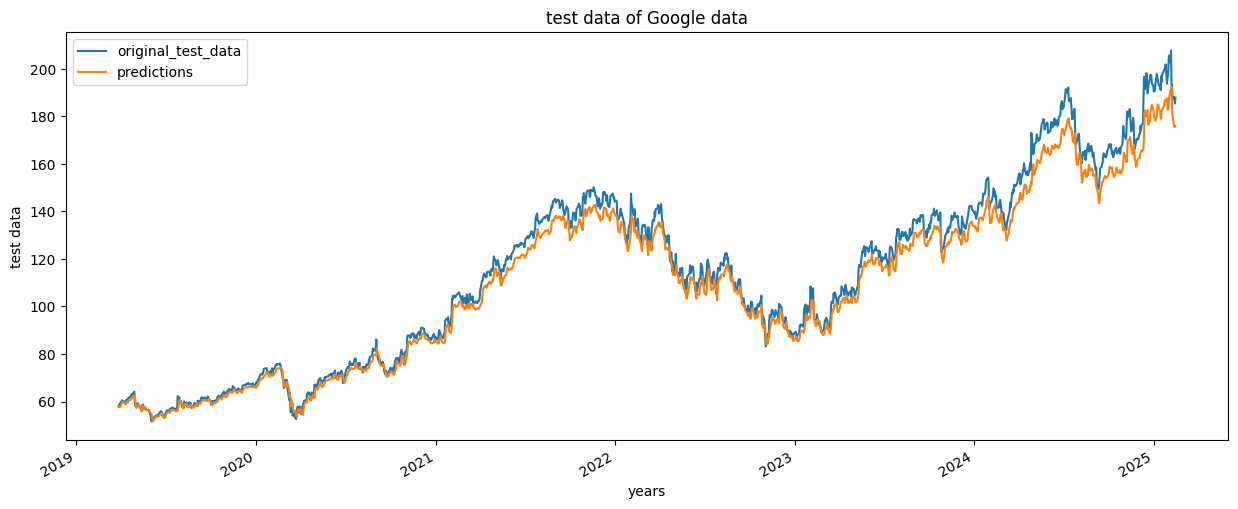

In [94]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

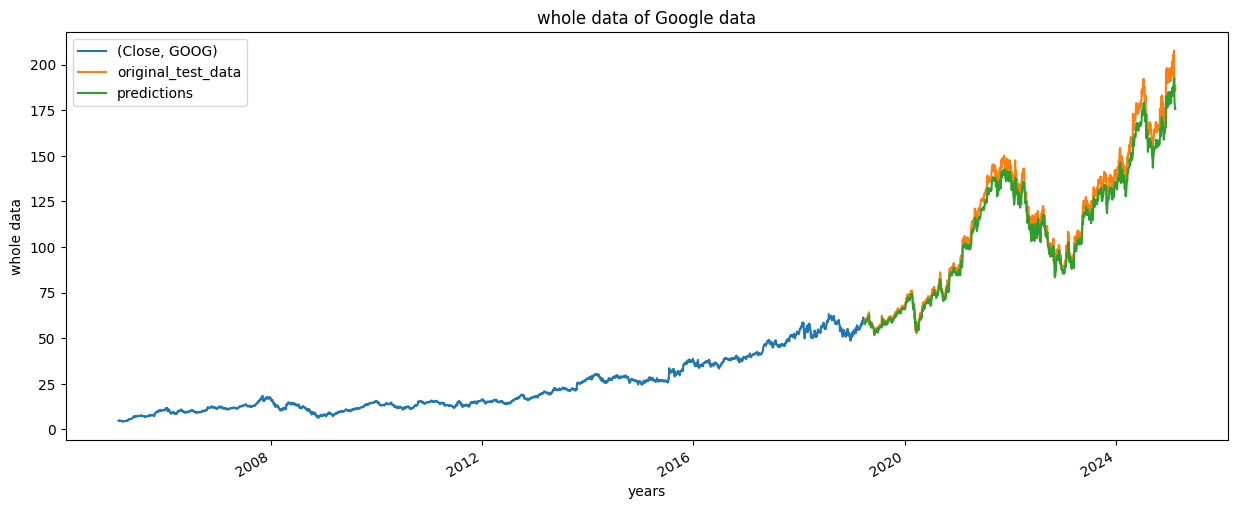

In [95]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [96]:
#/content/web_stock_price_predictor.py

In [97]:
model.save("Latest_stock_price_model.keras")

In [ ]:
! streamlit run web_stock_price_predictor.py & npx localtunnel --port 8501




⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.117.189:8501

⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://tangy-guests-divide.loca.lt
2025-02-14 08:23:27.591936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739521407.641884   10380 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739521407.656361   10380 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[*********************100%***********************]  1 of 1 completed
2025-02-14 08:23:34.631320: E extern